In [67]:
%matplotlib widget
from matplotlib import pyplot as plt
import pylab as py
import numpy as np
import scipy
from scipy.fft import fft, fftfreq, ifft
from scipy import signal

def sin(f = 1, T = 1, Fs = 128, phi =0 ):
    dt = 1.0/Fs
    t = np.arange(0,T,dt)
    s = np.sin(2*np.pi*f*t + phi)
    return (s,t)  

# Zadanie 1

Wykorzystując odpowiedź impulsową filtra zaprojektowaną w poprzednim tygodniu zastosuj okno kaisera przycinając filtr do długości 1s (jako długość wybierz najbliższą, nieparzystą liczbę próbek)

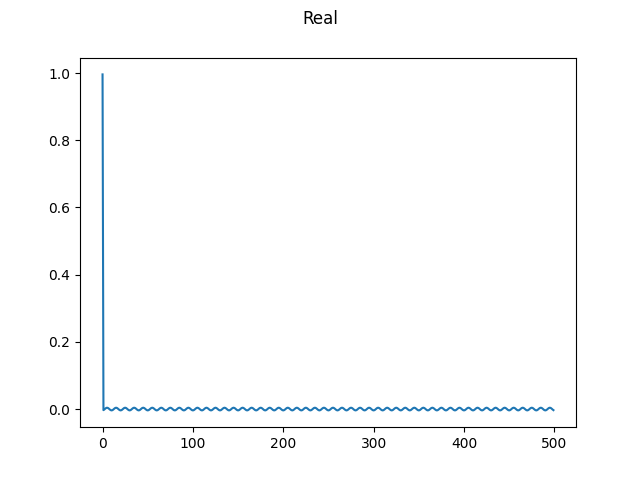

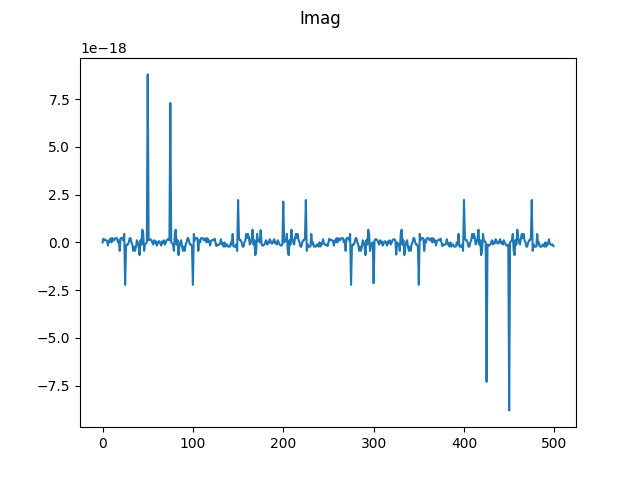

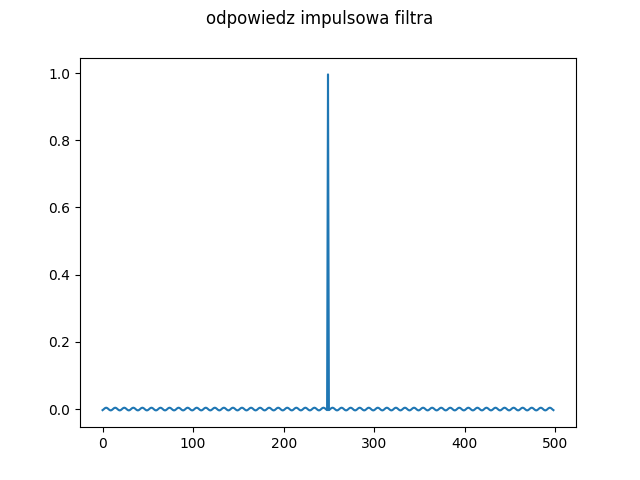

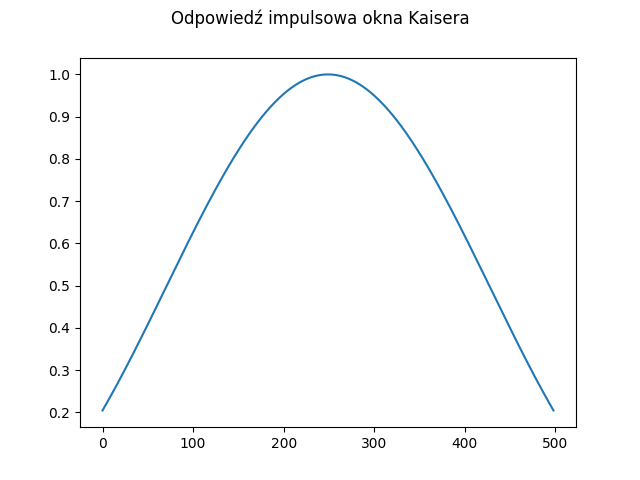

In [68]:
fs = 500
T = 1
y = sin(10, T, fs)[0] + 0.5 * sin(45, T, fs)[0] + 2 * sin(50, T, fs)[0]
yf = fft(y)

fir = np.ones(len(yf))
fir[50] = 0
fir[450] = 0

y_f = scipy.fft.ifft(fir)
plt.figure().suptitle("Real")
plt.plot(np.real(y_f))
plt.figure().suptitle("Imag")
plt.plot(np.imag(y_f))
y_f = np.concatenate((y_f[251:500], y_f[0:250]))
plt.figure().suptitle("odpowiedz impulsowa filtra")
plt.plot(np.real(y_f))

beta = 3
N = fs
if N % 2 == 0:
    N -= 1
    
kaiser = signal.kaiser(N, beta)

plt.figure().suptitle("Odpowiedź impulsowa okna Kaisera")
plt.plot(kaiser)

# Zadanie 2

Przetestuj działanie takiego filtra stosując funkcję lfilterprzyjmując że argument b zawiera współczynniki odpowiedzi impulsowej a a wynosi 1. Sprawdź efekt filtracji wyznaczając widmo sygnału

/home/lab/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


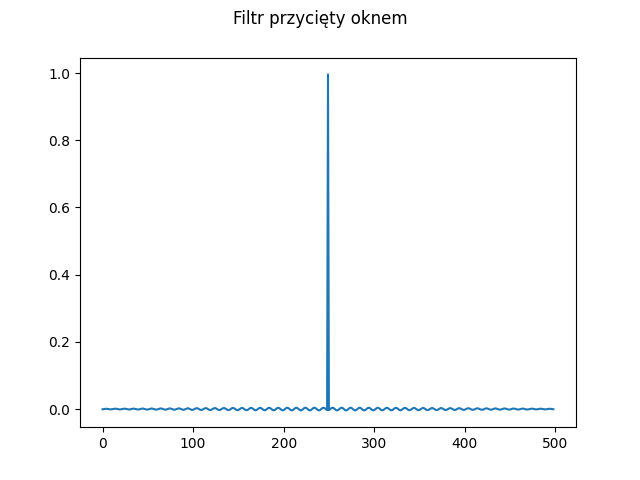

In [69]:
windowed = y_f[0:N] * kaiser
plt.figure().suptitle("Filtr przycięty oknem")
plt.plot(windowed)

/home/lab/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


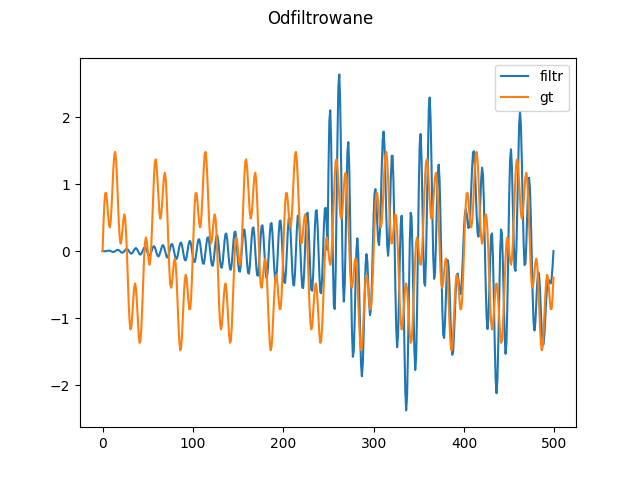

In [70]:
filtered = signal.lfilter(windowed, 1, y)
ground_truth = sin(10, T, fs)[0] + 0.5 * sin(45, T, fs)[0]
plt.figure().suptitle("Odfiltrowane")
plt.plot(filtered)
plt.plot(ground_truth)
plt.legend(["filtr", "gt"])
plt.show()

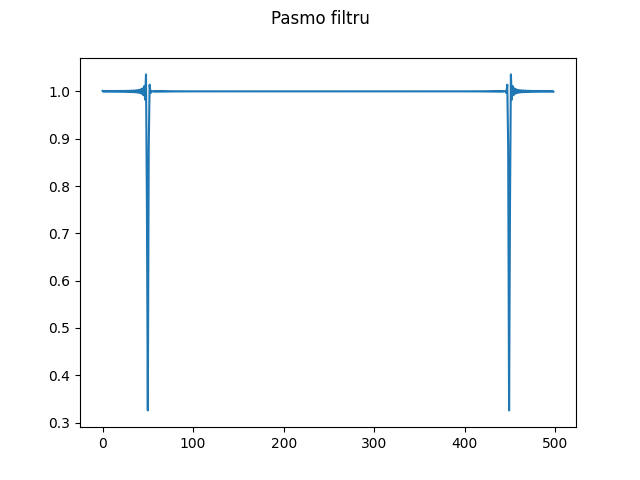

In [71]:
plt.figure().suptitle("Pasmo filtru")
plt.plot(abs(fft(windowed)))
plt.show()

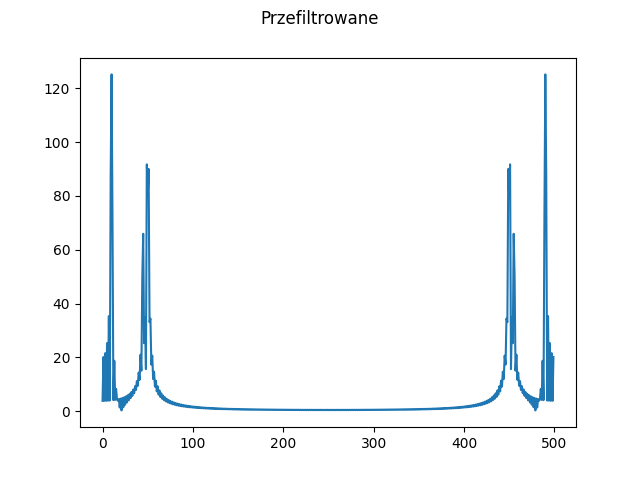

In [72]:
plt.figure().suptitle("Przefiltrowane")
plt.plot(abs(fft(filtered)))
plt.show()

# Zadanie 3

Przystosuj metodę do pracy w trybie on-line, tzn. do wielokrotnego wywołania funkcji lfilter dla nowych próbek. W takiej sytuacji konieczne jest przechowywanie informacji o stanie filtra. W tym celu wykorzystaj funkcję lfilter_zi do wygenerowania stanu początkowego: zi = lfilter_zi(b, 1) i następnie przy każdym wywołaniu funkcji lfilter: out, zi = lfilter(b, a, x,  zi=zi)